In [1]:
import numpy as np

In [3]:
with open ('demo.txt', 'r') as f:
    a = f.readlines ()
a[:5]

['4 -18 19\n', '3 18 -5\n', '-5 -8 -15\n', '-20 7 -16\n', '10 -13 -7\n']

In [4]:
M = len (a)
b = [[int (x) for x in row.split ()] for row in a]
print (b[:5], M)

[[4, -18, 19], [3, 18, -5], [-5, -8, -15], [-20, 7, -16], [10, -13, -7]] 91


In [5]:
c = {x for row in b for x in row}
print (c, len (c))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1} 40


In [6]:
N = len (c)
d = [[(x + N) % N - (x > 0) for x in row] for row in b]
d[:5]

[[3, 22, 18], [2, 17, 35], [35, 32, 25], [20, 6, 24], [9, 27, 33]]

In [72]:
def plot_matrix (matrix):
    matrix = np.array ([[i,j] for i in range (N) for j in range (N) if matrix[i,j]])
    from matplotlib import pyplot as plt
    plt.scatter (matrix[:,1], -matrix[:,0], c='g')
    plt.gca ().set_aspect (1)
    plt.xlabel ('Column Index', fontsize=12)
    plt.ylabel ('Row Index\n(Don\'t mind the negative)', fontsize=12)
    plt.show ()
    return matrix

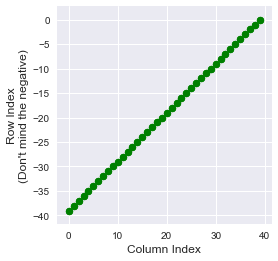

In [73]:
e = np.zeros ([N, N], dtype=bool)
e[range (N), range (N-1,-1,-1)] = 1
plot_matrix (e);

In [74]:
def make_edge (triple):
    triple = sorted (triple)
    from itertools import combinations
    for i,j in combinations (triple, 2):
        e[i,j] = e[j,i] = 1

177 more edges (268) than clauses (91).


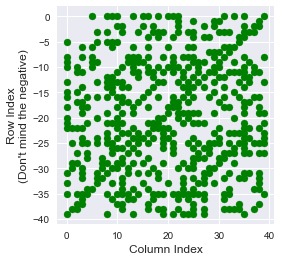

In [75]:
for row in d:
    make_edge (row)
E = (e.sum () - N) // 2 + N
print ('{} more edges ({}) than clauses ({}).'.format (E - M, E, M))
f = plot_matrix (e)

In [76]:
g = {i: {j for j in range (N) if e[i,j]} for i in range (N)}
print (*g.items (), sep='\n')

(0, {33, 35, 5, 39, 8, 9, 10, 13, 15, 16, 18, 20, 21, 22, 31})
(1, {38, 22, 25, 29, 30})
(2, {35, 37, 38, 10, 11, 15, 17, 22, 27, 29})
(3, {32, 35, 36, 37, 6, 8, 11, 14, 17, 18, 19, 22, 24, 25, 30, 31})
(4, {34, 35, 16, 18, 21, 25, 27, 28})
(5, {0, 34, 6, 8, 9, 10})
(6, {32, 33, 3, 5, 9, 13, 16, 20, 24, 25, 31})
(7, {32, 28, 29, 30})
(8, {0, 3, 35, 5, 39, 12, 13, 14, 16, 19, 21, 23, 24, 25, 29, 31})
(9, {0, 33, 36, 5, 6, 12, 13, 14, 15, 21, 25, 26, 27, 30})
(10, {0, 2, 35, 5, 37, 11, 13, 16, 18, 20, 21, 22, 24, 26, 29, 30})
(11, {32, 33, 2, 3, 34, 35, 37, 38, 10, 13, 14, 16, 17, 19, 21, 23, 26, 28, 29})
(12, {35, 36, 8, 9, 14, 17, 23, 25, 27, 30, 31})
(13, {0, 34, 36, 6, 39, 8, 9, 10, 11, 18, 19, 22, 24, 26, 29})
(14, {3, 35, 8, 9, 11, 12, 17, 23, 24, 25, 27, 31})
(15, {0, 33, 2, 9, 16, 24, 29})
(16, {0, 34, 4, 37, 6, 38, 8, 10, 11, 15, 18, 21, 23, 25, 28, 31})
(17, {2, 3, 35, 36, 11, 12, 14, 21, 22, 24, 30})
(18, {0, 32, 3, 4, 35, 38, 10, 13, 16, 20, 21, 22, 31})
(19, {3, 35, 38, 39, 

In [97]:
def bfs (adjacencies, start=None):
    # Precondition:
    assert adjacencies
    
    # Track remaining unprocessed nodes
    remaining = {x for x in adjacencies.keys ()}
    
    # Decide BFS starting root node
    if start in remaining:
        remaining.remove (start)
    else:
        start = remaining.pop ()
    
    # BFS layers and record of seen nodes
    layers = [{start}]
    seen = {start}
    
    while remaining:
        # Prepare to construct next_layer
        prev_layer = layers[-1]
        next_layer = set ()
        
        # Populate next_layer
        for node in prev_layer:
            next_layer |= adjacencies[node]
        next_layer -= seen
        
        # Record next_layer
        remaining -= next_layer
        seen |= next_layer
        layers.append (next_layer)
        # Note: Append even if next_layer is empty.
        # An empty set will separate layers of
        # different connected components
        
        # Start new connected component
        if not next_layer and remaining:
            start = remaining.pop ()
            seen.add (start)
            layers.append ({start})
        
        # Remove final trailing empty set
        elif not next_layer:
            layers.pop ()
            
    return layers

In [98]:
h = bfs (g)
print (*h, sep='\n')
len (h)

{0}
{33, 35, 5, 39, 8, 9, 10, 13, 15, 16, 18, 20, 21, 22, 31}
{1, 2, 3, 4, 6, 11, 12, 14, 17, 19, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 36, 37, 38}
{7}


4

In [139]:
def recursive_bfs (adjacencies):
    # Precondition:
    assert adjacencies
    
    # Run BFS initially to get layers
    layers = bfs (adjacencies)

    # Recursively decompose each BFS layer
    for i, layer in enumerate (layers):
        # Prepare layer-local adjacencies
        # (i.e. restrict edges to nodes within this layer)
        local_adjacencies = {node: adjacencies[node] & layer for node in layer}
        
        # Done if there is only one (or fewer) node
        if len (local_adjacencies) <= 1:
            continue
        
        # Update layer with recursively decomposed result
        else:
            layers[i] = recursive_bfs (local_adjacencies)

    return layers

In [140]:
p = recursive_bfs (g)
print (*p, sep='\n')
len (p)

{0}
[{33}, [{9}, {15}, set(), {20}], [{5}, {10}, [{13}, [{18}, {22}], [{16}, {21}]]], [{8}, [{35}, [{39}, set(), {31}]]]]
[{1}, [{25}, [{29}, {30}, set(), {38}]], [{32}, [{34}, [{11}, {23}], {3}, {6}, set(), {27}], [{2}, [{17}, set(), {37}], [{24}, {14}, {12}], {19}, {26}, {28}, {4}]], {36}]
{7}


4

In [148]:
def render (bfs_tree, depth=0):
    text = []
    
    # Record seen nodes just to double-check
    seen = set ()

    # Set div orientation and indent level
    indent = '  ' * (depth + 1)
    if depth % 2:
        orientation = 'horizontal'
    else:
        orientation = 'vertical'

    # Render each layer (recursively if needed)
    for i, layer in enumerate (bfs_tree):
        
        # Connected component divider
        if not layer:
            text.append ('{}<div class="break {}"></div>'.format (indent, orientation))
        
        # Node
        elif isinstance (layer, set):
            text.append ('{}<div class="node {}">{}</div>'.format (indent, orientation, *layer))
            seen.update (layer)
            
        # Layer (must recurse deeper)
        else:
            rendered, _ = render (layer, depth=depth+1)
            text.append ('{}<div class="layer {}">\n{}\n{}</div>'.format (indent, orientation, rendered, indent))
            seen.update (_)
    
    # Join rendered layers
    text = '\n'.join (text)
    
    # For outermost level, wrap in container, apply stylesheet
    if depth == 0:
        container = '<div class="container horizontal">\n{}\n</div>\n'
        style = '<link rel="stylesheet" type="text/css" href="bfs_style.css">'
        container += style
        text = container.format (text)
    
    return text, seen

In [150]:
text, seen = render (p)
print (seen)
print (text)
with open ('output.html', 'wt') as f:
    f.write (text)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}
<div class="container horizontal">
  <div class="node vertical">0</div>
  <div class="layer vertical">
    <div class="node horizontal">33</div>
    <div class="layer horizontal">
      <div class="node vertical">9</div>
      <div class="node vertical">15</div>
      <div class="break vertical"></div>
      <div class="node vertical">20</div>
    </div>
    <div class="layer horizontal">
      <div class="node vertical">5</div>
      <div class="node vertical">10</div>
      <div class="layer vertical">
        <div class="node horizontal">13</div>
        <div class="layer horizontal">
          <div class="node vertical">18</div>
          <div class="node vertical">22</div>
        </div>
        <div class="layer horizontal">
          <div class="node vertical">16</div>
          <div class="node vertical">21</div>
        </div>
 